In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
dataset_dir = '../dataset'

train_dir = os.path.join(dataset_dir, 'Training Images')
test_dir = os.path.join(dataset_dir, 'Testing Images')

train_file = os.path.join(dataset_dir, 'Train.csv')
test_file = os.path.join(dataset_dir, 'Test.csv')

In [3]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

<Axes: ylabel='count'>

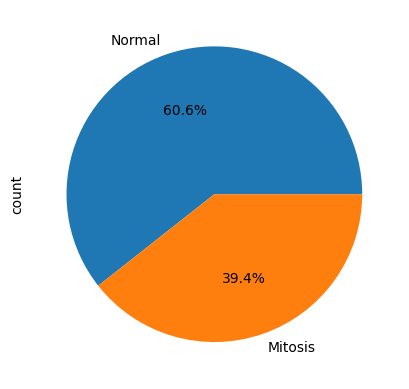

In [4]:
train_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [5]:
training_images = [img for img in os.listdir(train_dir) if img != '.DS_Store']
testing_images = [img for img in os.listdir(test_dir) if img != '.DS_Store']

print(f'Training images: {len(training_images)}')
print(f'Testing images: {len(testing_images)}')

Training images: 226
Testing images: 57


In [6]:
train_df['Image Path'] = train_df['Image'].apply(lambda x: os.path.join(train_dir, str(x) + '.jpg'))
test_df['Image Path'] = test_df['Image'].apply(lambda x: os.path.join(test_dir, str(x) + '.jpg'))

In [7]:
train_df['Width'] = train_df['Image Path'].apply(lambda x: plt.imread(x).shape[1])
train_df['Height'] = train_df['Image Path'].apply(lambda x: plt.imread(x).shape[0])

test_df['Width'] = test_df['Image Path'].apply(lambda x: plt.imread(x).shape[1])
test_df['Height'] = test_df['Image Path'].apply(lambda x: plt.imread(x).shape[0])

In [8]:
train_df['Aspect Ratio'] = train_df['Width'] / train_df['Height']
test_df['Aspect Ratio'] = test_df['Width'] / test_df['Height']

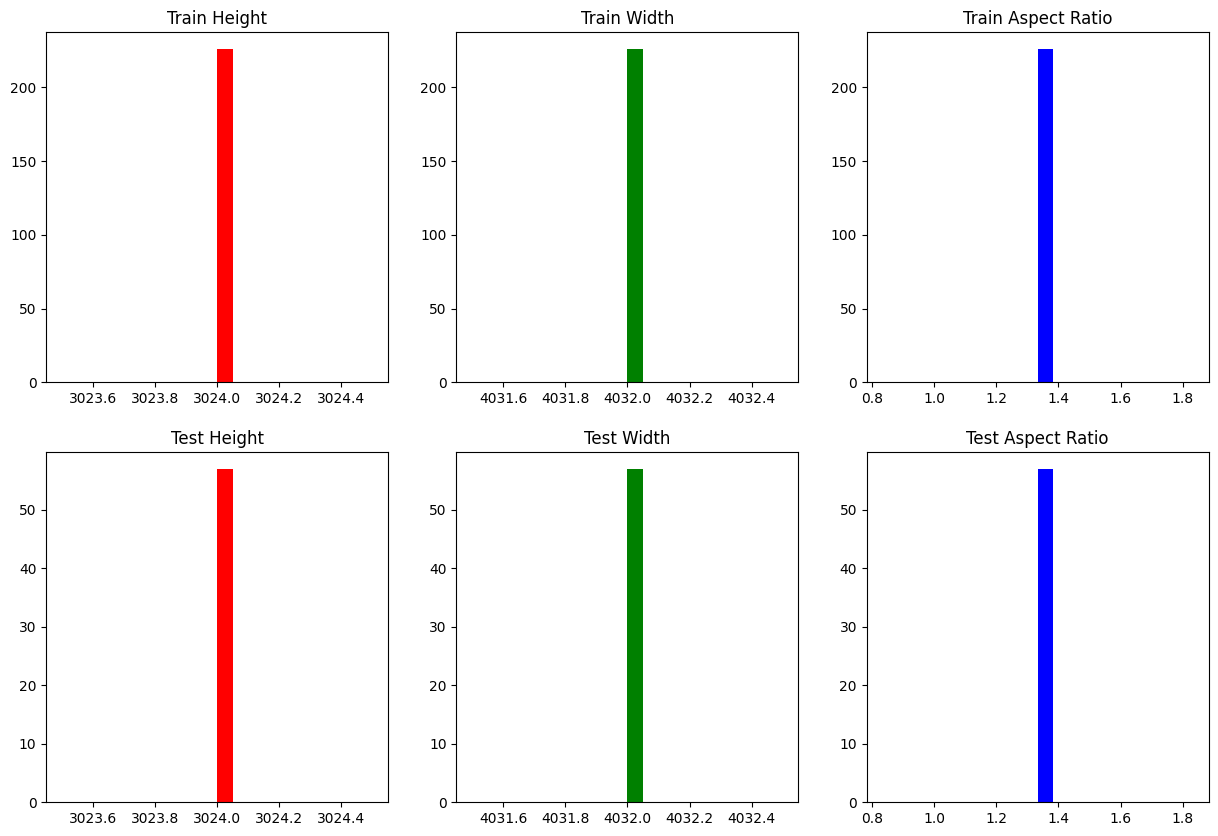

In [9]:
# plot 6 plots
# train height hist, train width hist, train aspect ratio hist
# test height hist, test width hist, test aspect ratio hist

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].hist(train_df['Height'], bins=20, color='r')
ax[0, 0].set_title('Train Height')

ax[0, 1].hist(train_df['Width'], bins=20, color='g')
ax[0, 1].set_title('Train Width')

ax[0, 2].hist(train_df['Aspect Ratio'], bins=20, color='b')
ax[0, 2].set_title('Train Aspect Ratio')

ax[1, 0].hist(test_df['Height'], bins=20, color='r')
ax[1, 0].set_title('Test Height')

ax[1, 1].hist(test_df['Width'], bins=20, color='g')
ax[1, 1].set_title('Test Width')

ax[1, 2].hist(test_df['Aspect Ratio'], bins=20, color='b')
ax[1, 2].set_title('Test Aspect Ratio')

plt.show()

In [10]:
# plot rgb histograms for training and testing images
train_r = []
train_g = []
train_b = []

for img in train_df['Image Path']:
    img = plt.imread(img)
    train_r.append(img[:, :, 0].mean())
    train_g.append(img[:, :, 1].mean())
    train_b.append(img[:, :, 2].mean())

test_r = []
test_g = []
test_b = []

for img in test_df['Image Path']:
    img = plt.imread(img)
    test_r.append(img[:, :, 0].mean())
    test_g.append(img[:, :, 1].mean())
    test_b.append(img[:, :, 2].mean())

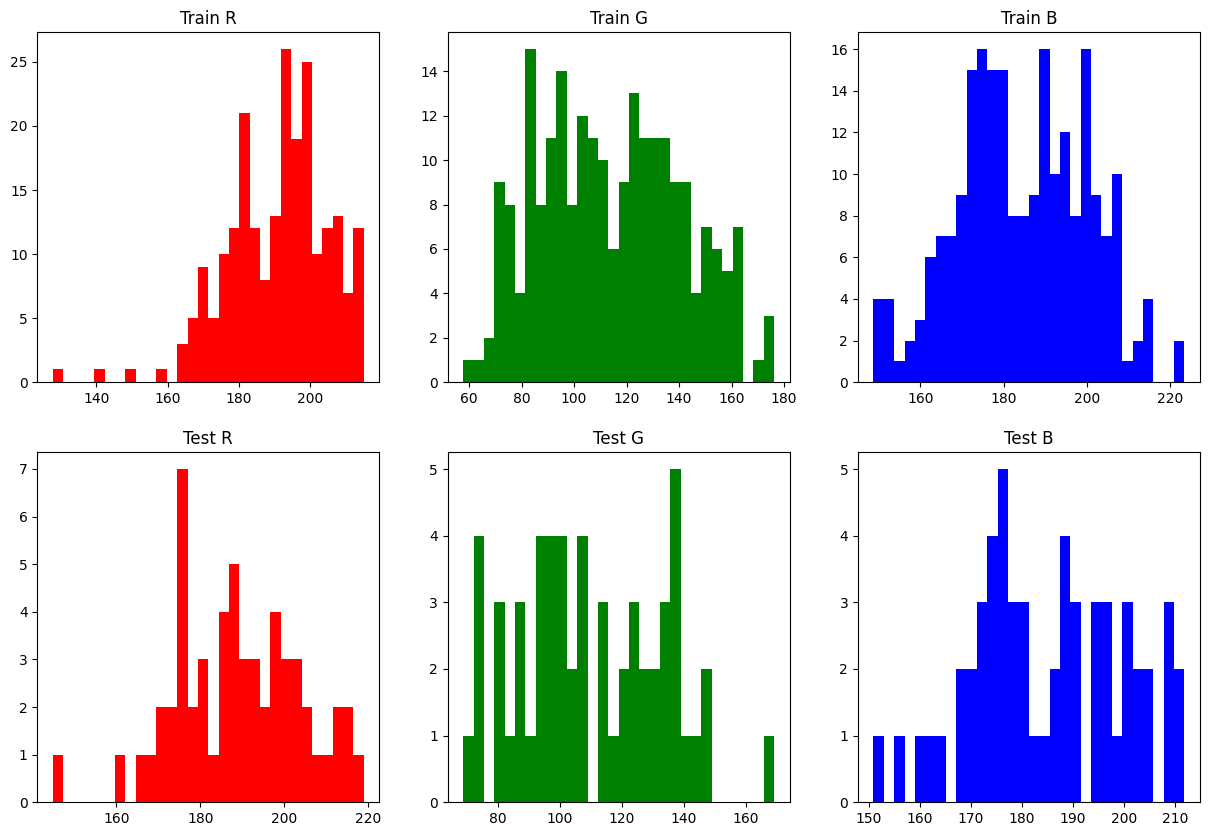

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
bins = 30

ax[0, 0].hist(train_r, bins=bins, color='r')
ax[0, 0].set_title('Train R')

ax[0, 1].hist(train_g, bins=bins, color='g')
ax[0, 1].set_title('Train G')

ax[0, 2].hist(train_b, bins=bins, color='b')
ax[0, 2].set_title('Train B')

ax[1, 0].hist(test_r, bins=bins, color='r')
ax[1, 0].set_title('Test R')

ax[1, 1].hist(test_g, bins=bins, color='g')
ax[1, 1].set_title('Test G')

ax[1, 2].hist(test_b, bins=bins, color='b')
ax[1, 2].set_title('Test B')

plt.show()

In [12]:
train_mitosis_images = train_df[train_df['Label'] == 'Mitosis']
train_normal_images = train_df[train_df['Label'] == 'Normal']

# plot rgb histograms for mitosis and normal images
mitosis_r = []
mitosis_g = []
mitosis_b = []

for img in train_mitosis_images['Image Path']:
    img = plt.imread(img)
    mitosis_r.append(img[:, :, 0].mean())
    mitosis_g.append(img[:, :, 1].mean())
    mitosis_b.append(img[:, :, 2].mean())

normal_r = []
normal_g = []
normal_b = []

for img in train_normal_images['Image Path']:
    img = plt.imread(img)
    normal_r.append(img[:, :, 0].mean())
    normal_g.append(img[:, :, 1].mean())
    normal_b.append(img[:, :, 2].mean())

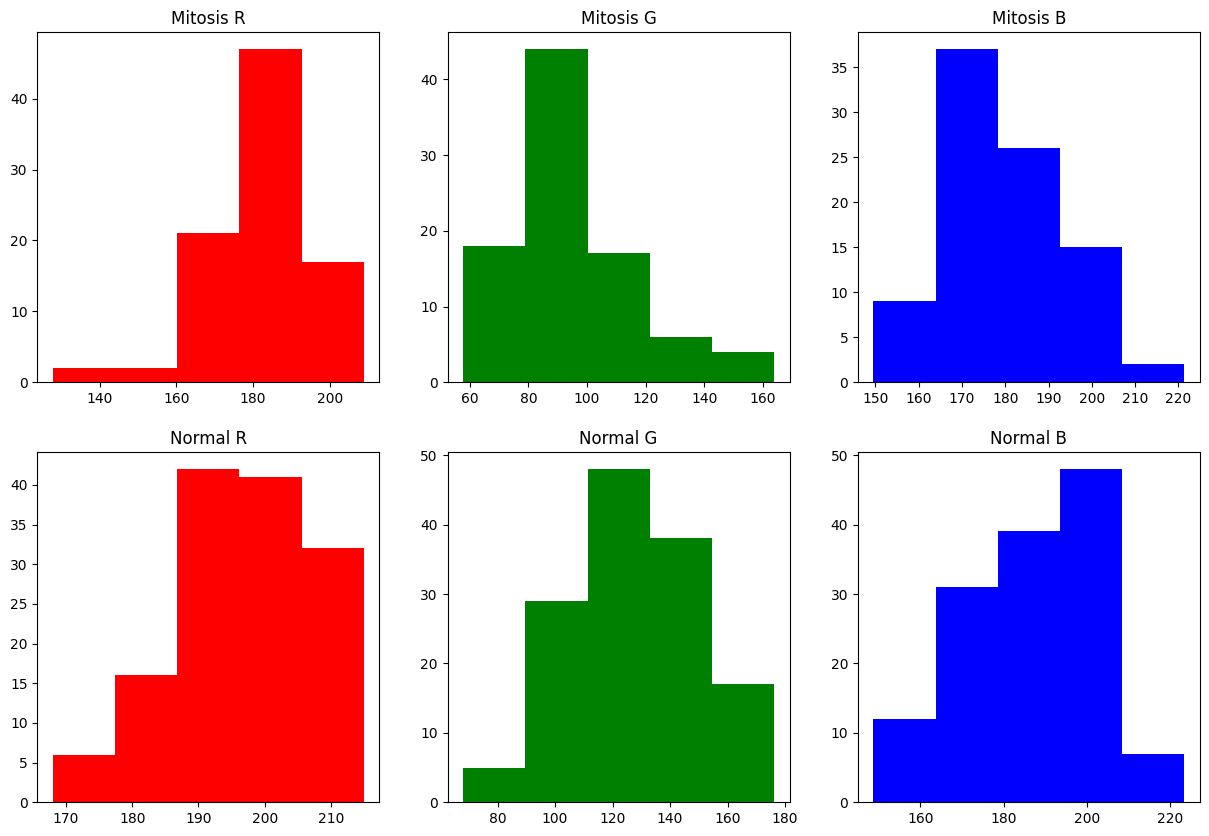

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
bins = 5

ax[0, 0].hist(mitosis_r, bins=bins, color='r')
ax[0, 0].set_title('Mitosis R')

ax[0, 1].hist(mitosis_g, bins=bins, color='g')
ax[0, 1].set_title('Mitosis G')

ax[0, 2].hist(mitosis_b, bins=bins, color='b')
ax[0, 2].set_title('Mitosis B')

ax[1, 0].hist(normal_r, bins=bins, color='r')
ax[1, 0].set_title('Normal R')

ax[1, 1].hist(normal_g, bins=bins, color='g')
ax[1, 1].set_title('Normal G')

ax[1, 2].hist(normal_b, bins=bins, color='b')
ax[1, 2].set_title('Normal B')

plt.show()

In [19]:


from transformers import CLIPProcessor, CLIPModel
import torch
from skimage import io

model_name = 'openai/clip-vit-base-patch32'
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

def get_image_embeddings(image_path):
    inputs = processor(images=io.imread(image_path), return_tensors="pt")
    with torch.no_grad():
        outputs = model.get_image_features(**inputs)
    
    # output shape -> (1, 512)
    return outputs

In [20]:
train_df['embeddings'] = train_df['Image Path'].apply(get_image_embeddings)
test_df['embeddings'] = test_df['Image Path'].apply(get_image_embeddings)

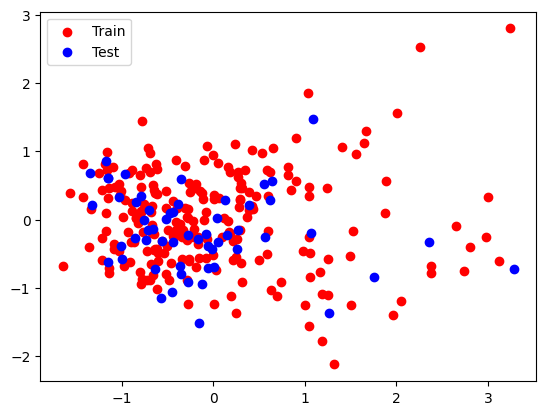

In [33]:
# apply pca to reduce the dimensionality of the embeddings to 2 dimensions
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)

# perform a pca such that train and test embeddings are transformed to 2 dimensions
train_embeddings = np.array([x.numpy().flatten() for x in train_df['embeddings']])
test_embeddings = np.array([x.numpy().flatten() for x in test_df['embeddings']])
train_pca = pca.fit_transform(train_embeddings)
test_pca = pca.transform(test_embeddings)

# plot the pca embeddings in 3d
plt.scatter(train_pca[:, 0], train_pca[:, 1], c='r', label='Train')
plt.scatter(test_pca[:, 0], test_pca[:, 1], c='b', label='Test')
plt.legend()
plt.show()

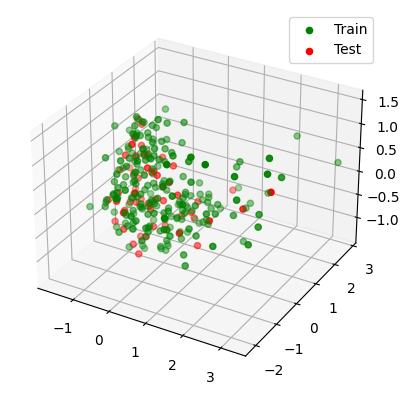

In [32]:
# apply pca to reduce the dimensionality of the embeddings to 2 dimensions
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)

# perform a pca such that train and test embeddings are transformed to 2 dimensions
train_embeddings = np.array([x.numpy().flatten() for x in train_df['embeddings']])
test_embeddings = np.array([x.numpy().flatten() for x in test_df['embeddings']])
train_pca = pca.fit_transform(train_embeddings)
test_pca = pca.transform(test_embeddings)

# plot the pca embeddings in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_pca[:, 0], train_pca[:, 1], train_pca[:, 2], c='g', label='Train')
ax.scatter(test_pca[:, 0], test_pca[:, 1], test_pca[:, 2], c='r', label='Test')
plt.legend()
plt.show()

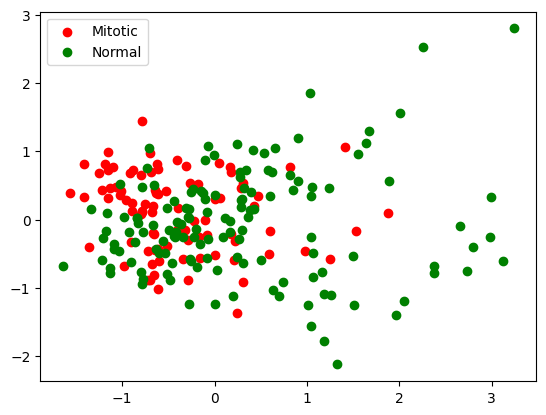

In [35]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)

train_embeddings = np.array([x.numpy().flatten() for x in train_df['embeddings']])
train_pca = pca.fit_transform(train_embeddings)

train_mitosis_images = train_df[train_df['Label'] == 'Mitosis']
train_normal_images = train_df[train_df['Label'] == 'Normal']

mitotic_embeddings = np.array([x.numpy().flatten() for x in train_mitosis_images['embeddings']])
normal_embeddings = np.array([x.numpy().flatten() for x in train_normal_images['embeddings']])
mitotic_pca = pca.transform(mitotic_embeddings)
normal_pca = pca.transform(normal_embeddings)

plt.scatter(mitotic_pca[:, 0], mitotic_pca[:, 1], c='r', label='Mitotic')
plt.scatter(normal_pca[:, 0], normal_pca[:, 1], c='g', label='Normal')
plt.legend()
plt.show()

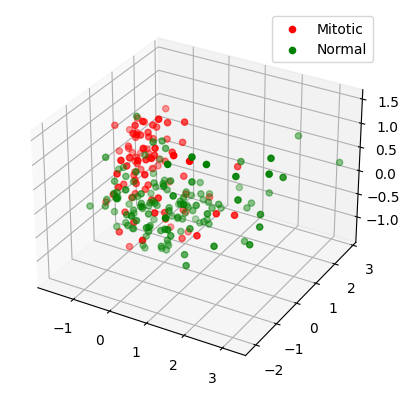

In [36]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)

train_embeddings = np.array([x.numpy().flatten() for x in train_df['embeddings']])
train_pca = pca.fit_transform(train_embeddings)

train_mitosis_images = train_df[train_df['Label'] == 'Mitosis']
train_normal_images = train_df[train_df['Label'] == 'Normal']

mitotic_embeddings = np.array([x.numpy().flatten() for x in train_mitosis_images['embeddings']])
normal_embeddings = np.array([x.numpy().flatten() for x in train_normal_images['embeddings']])
mitotic_pca = pca.transform(mitotic_embeddings)
normal_pca = pca.transform(normal_embeddings)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mitotic_pca[:, 0], mitotic_pca[:, 1], mitotic_pca[:, 2], c='r', label='Mitotic')
ax.scatter(normal_pca[:, 0], normal_pca[:, 1], normal_pca[:, 2], c='g', label='Normal')
plt.legend()
plt.show()


In [38]:
# save train_df and test_df in csv

os.makedirs('output', exist_ok=True)
train_df.to_csv(os.path.join('output', 'train_df.csv'), index=False)
test_df.to_csv(os.path.join('output', 'test_df.csv'), index=False)

In [19]:
# load train_df and test_df from csv

train_df = pd.read_csv(os.path.join('output', 'train_df.csv'))
test_df = pd.read_csv(os.path.join('output', 'test_df.csv'))





import ast

# Function to convert embedding string to a NumPy array
def convert_embedding_string_to_array(embedding_str):
    cleaned_str = embedding_str.replace('tensor(', '').replace(')', '')
    embedding_list = ast.literal_eval(cleaned_str)
    return torch.tensor(embedding_list)


train_df['embeddings'] = train_df['embeddings'].apply(convert_embedding_string_to_array)
test_df['embeddings'] = test_df['embeddings'].apply(convert_embedding_string_to_array)

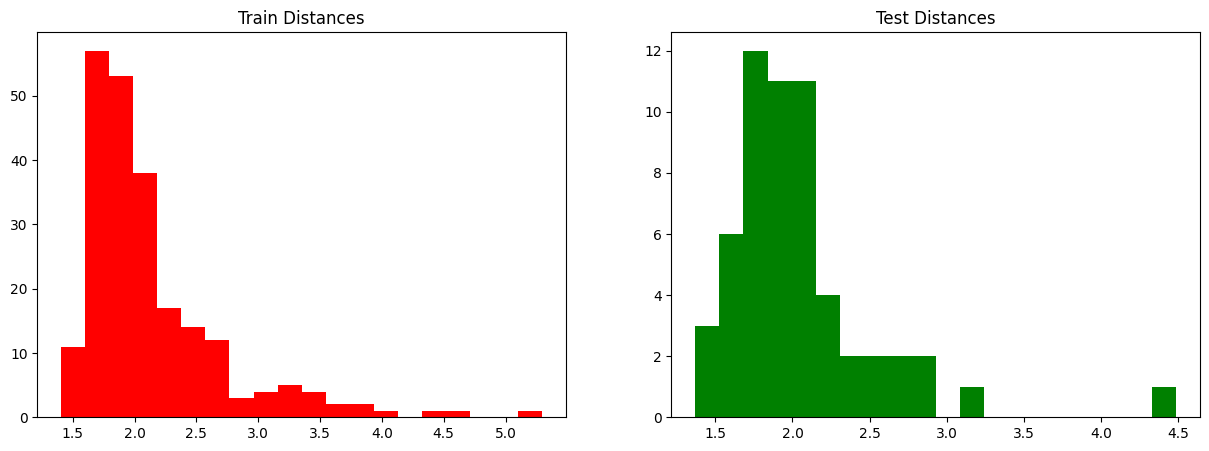

0.3421994


In [23]:
train_embeddings = np.array([x.numpy().flatten() for x in train_df['embeddings']])
test_embeddings = np.array([x.numpy().flatten() for x in test_df['embeddings']])

train_centroid = train_embeddings.mean(axis=0)
test_centroid = test_embeddings.mean(axis=0)

# calculate the distance of each train and test embedding from the centroid
train_distances = np.linalg.norm(train_embeddings - train_centroid, axis=1)
test_distances = np.linalg.norm(test_embeddings - test_centroid, axis=1)

# plot the distances
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(train_distances, bins=20, color='r')
ax[0].set_title('Train Distances')
ax[1].hist(test_distances, bins=20, color='g')
ax[1].set_title('Test Distances')
plt.show()

# print the distance between centroids, euclidean distance
print(np.linalg.norm(train_centroid - test_centroid))